<h1><center>Übungszettel 5</center></h1>
<h2><center>Inhaltsbasierte Bild- und Videoanalyse - SoSe 19</center></h2>
<h3><center>Abgabe: Mo. 07.06.2019 - 12:00 Uhr</center></h3>



### Aufgabe 1 - Tensorflow (6+2 Punkte)}

a) Installieren Sie Tensorflow 
(www.tensorflow.org/install). 
Bilden Sie den Berechnungsgraph aus Aufgabe 1 von Übungszettel 4 in
Tensorflow nach, füttern Sie den Graph mit den gegebenen Input-Werten 
und lassen Sie die Werte $f_t$, $\frac{df_t}{dw_0}$, $\frac{df_t}{dw_1}$,
$\frac{df_t}{dw_2}$, $\frac{df_t}{dx_0}$, $\frac{df_t}{dx_1}$,
$\frac{df_t}{dx_2}$, $\frac{df_t}{db}$ automatisch berechnen.

In [30]:
import numpy as np
import tensorflow as tf

tf.reset_default_graph()

w_0 = tf.placeholder(tf.float32)
w_1 = tf.placeholder(tf.float32)
w_2 = tf.placeholder(tf.float32)
x_0 = tf.placeholder(tf.float32)
x_1 = tf.placeholder(tf.float32)
x_2 = tf.placeholder(tf.float32)

b = tf.placeholder(tf.float32)

y_0 = tf.multiply(w_0, x_0, name="W_0xX_0")
y_1 = tf.multiply(w_1, x_1, name="W_1xX_1")
y_2 = tf.multiply(w_2, x_2, name="W_2xX_2")

f_1 = tf.add_n([y_0, y_1, y_2, b], name='f_1')
f_2 = tf.multiply(f_1, 2, name="f_2")
f_3 = tf.math.exp(f_2, name="f_3")
f_4 = tf.add(f_3, 1.0, name="f_4")
f_5 = tf.divide(2.0, f_4, name="f_5")
f_t = tf.subtract(1.0, f_5, name="f_t")

grad_w_0, grad_w_1, grad_w_2, grad_x_0, grad_x_1, grad_x_2, grad_b = tf.gradients(
    f_t,
    [
        w_0,
        w_1,
        w_2,
        x_0,
        x_1,
        x_2,
        b
    ])

with tf.Session() as sess:
    values = {
        w_0: 2.0,
        w_1: 3.0,
        w_2: -1.0,
        x_0: -0.75,
        x_1: 2.0,
        x_2: 3.0,
        b: -2.0
    }
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    out = sess.run([
        f_t,
        grad_w_0,
        grad_w_1,
        grad_w_2,
        grad_x_0,
        grad_x_1,
        grad_x_2,
        grad_b
        ], feed_dict=values);
    f_t_val, grad_w_0_val, grad_w_1_val, grad_w_2_val, grad_x_0_val, grad_x_1_val, grad_x_2_val, grad_b_val = out;

    print('ft: {0}'.format(f_t_val))
    print('dft/dw0: {0}, \ndft/dw1: {1},\ndft/dw2: {2}'.format(
            grad_w_0_val, 
            grad_w_1_val,
            grad_w_2_val 
            ))
    print('dft/dx0: {0},\ndft/dx1: {1},\ndft/dx2: {2}'.format(
            grad_x_0_val, 
            grad_x_1_val,
            grad_x_2_val 
            ))
    print('dft/db: {0}'.format(grad_b_val))


ft: -0.46211719512939453
dft/dw0: -0.5898358225822449, 
dft/dw1: 1.5728955268859863,
dft/dw2: 2.3593432903289795
dft/dx0: 1.5728955268859863,
dft/dx1: 2.3593432903289795,
dft/dx2: -0.7864477634429932
dft/db: 0.7864477634429932


b) Visualieren Sie den Graph mithilfe von Tensorboard. Speichern Sie den Graph als Bild ab und binden Sie die Grafik mithilfe von "%matplotlib inline" ein.

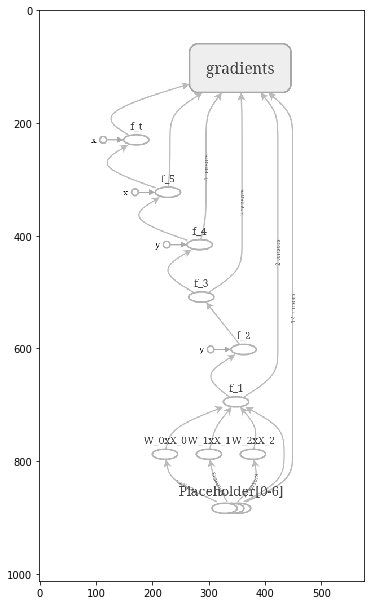

In [35]:
import PIL
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

img = PIL.Image.open("graph.png")

plt.imshow(img)


### Aufgabe 2 - Convolutional Neural Networks (8 Punkte)

Betrachten Sie ein CNN mit eindimensionalem Input. Die Konzepte für den eindimensionalen Fall entsprechen denen für zweidimensionale Netze. Daten werden im Netz als dreidimensionale Arrays interpretiert. Jede Zeile entspricht einer Featuremap, jede Spalte einer Dimension und die Tiefe des Arrays der Batch-Größe. Hier wird allerdings nur ein Eingabevektor betrachtet, die Tiefe ist daher eins.

Das CNN ist folgendermaßen spezifiziert:
- **Input**: Matrix der Größe $1\times12\times1$. Die Eingabe besteht also aus einer einzigen Featuremap mit 12 Dimensionen.
- **Erste Convolutional Layer**: Zwei Filter $F_0^1=(-1,0,1)$ und $F_1^1=(1,0,-1)$ mit Padding = 0 und Schrittweite = 1.
- **Max Pooling Layer** mit Größe = 2 und Schrittweite = 2.
- **Zweite Convolutional Layer**: Filter $F_0^2=((-1,0,1),(1,0,-1))$ mit Padding = 0 und Schrittweite = 1.
- **Vollständig verbundene Schicht (FC)**, die alle Eingaben auf zwei Ausgaben abbildet. Die Gewichte für die erste Ausgabe sind alle -1 und für die zweite Ausgabe alle 1.
- **Sigmoid-Aktivierungsfunktion**

Berechnen Sie die Ausgabe des neuronalen Netzes für den Input (0,0,0,0,1,1,1,1,0,0,0,0):

<center>
    $\begin{align*}
        (0,0,0,0,1,1,&1,1,0,0,0,0) \\
        \Downarrow& \quad Conv 1 \\
        (...&) \\
        (...&) \\
        \Downarrow& \quad Pooling \\
        \\
        \Downarrow& \quad Conv 2 \\
        \\
        \Downarrow& \quad FC \\
        \\
        \Downarrow& \quad Sigmoid \\
        (?,?&)
    \end{align*}$
</center>